In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train=pd.read_csv("drugsComTrain_raw.csv")

In [4]:
df_test=pd.read_csv("drugsComTest_raw.csv")

In [5]:
df_train.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
df_test.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [7]:
df_train["review"][0]

'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

In [8]:
df=pd.concat((df_train,df_test),axis=0,ignore_index=True)

In [9]:
len(df["uniqueID"].value_counts())

215063

In [10]:
!pip install skimpy
from skimpy import skim
skim(df)

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 215063 │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean     ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ uniqueID       │   0 │      0 │   116000 │   67010 │   0 │   58120 │  115900 │  174000 │  232300 │ ▇▇▇▇▇▇  │  │
│ │ rating         │   0 │      0 │     6.99 │   3.276 │   1 │       5 │       8 │      10 │      10 │ ▃▁▁▁▃▇  │  │
│ │ usefulCount    │   0 │      0 │       28 │   36.35 │   0 │       6 │      16 │      36 │    1291 │    ▇    │  │
│ └────────────────┴─────┴────────┴──────────┴─────────┴─────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ drugName                 │          0 │          0 │                         1.5 │                  317447 │  │
│ │ condition                │       1194 │       0.56 │                         1.8 │                  393990 │  │
│ │ review                   │          0 │          0 │                          86 │                18416281 │  │
│ │ date                     │          0 │          0 │                           1 │                  215063 │  │
│ └──────────────────────────┴────────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [11]:
#It is evident that all the reviews are unique from above no id has multiple review

In [12]:
df["drugName"].value_counts().count()

3671

In [13]:
df["condition"].value_counts().count()

916

In [14]:
# Unique Drug Names: 3,671 unique drugs in the dataset.
# Unique Conditions: 916 unique medical conditions covered.
# On average, there are about 4 different drugs available for each medical condition.

<Axes: >

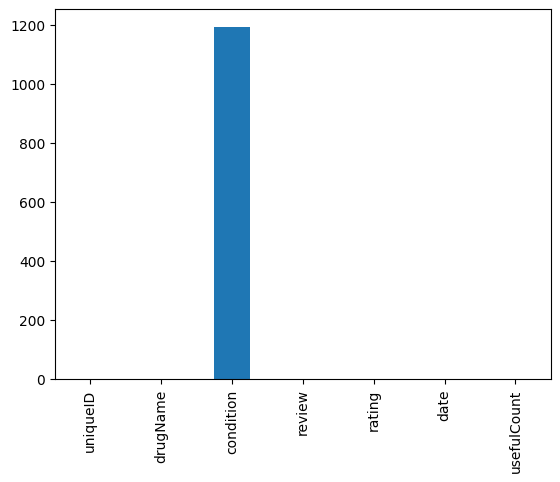

In [15]:
df.isnull().sum().plot(kind="bar")

In [16]:
df.isnull().mean()*100

,0
uniqueID,0.000000
drugName,0.000000
condition,0.555186
review,0.000000
rating,0.000000
date,0.000000
usefulCount,0.000000


In [17]:
# filling missing value before EDA using groupby
# Decided to fill null value with groupby drugName

In [18]:
df["new_condition"] = df.groupby("drugName")["condition"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

In [19]:
df["condition"]=np.where(df["condition"].isna(),df["new_condition"],df["condition"])

In [20]:
df=df.dropna()


In [21]:
# Exploratory data analysis
# df=df.drop(columns="new_condition")
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,new_condition
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Left Ventricular Dysfunction
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,ADHD
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Birth Control
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Birth Control
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Opiate Dependence


<Axes: ylabel='count'>

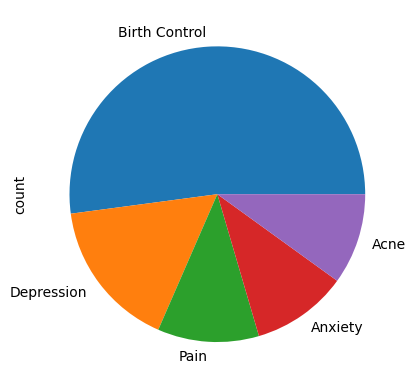

In [22]:
df["condition"].value_counts().sort_values(ascending = False)[:5].plot(kind="pie")

<Axes: xlabel='condition'>

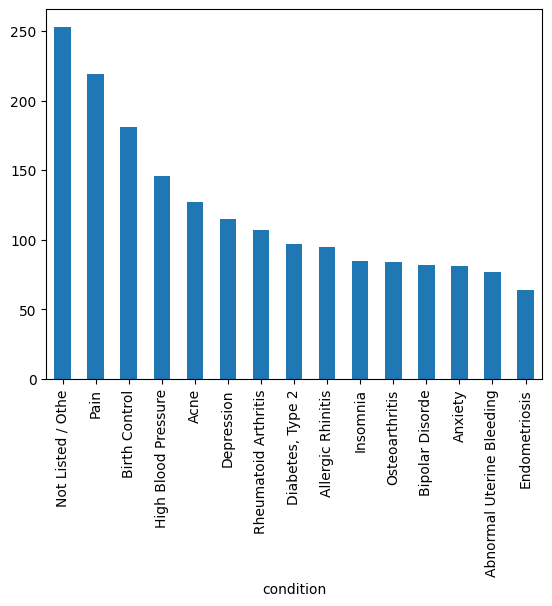

In [23]:
df.groupby("condition")["drugName"].nunique().sort_values(ascending =False)[:15].plot(kind="bar")
# "Pain," "Birth Control," and "Not Listed/Other" have the most drug variety.
# Fewer drugs are used for conditions like "Endometriosis."

In [24]:
df.groupby("condition")["drugName"].nunique().sort_values(ascending =False)[:21]

,drugName
condition,
Not Listed / Othe,253
Pain,219
Birth Control,181
High Blood Pressure,146
Acne,127
Depression,115
Rheumatoid Arthritis,107
"Diabetes, Type 2",97
Allergic Rhinitis,95


In [25]:
# here we cna see that there are some inappropriate conditions

In [26]:
df[df["condition"].str.contains("span")]
# these are wrong values and result of bad web scapping and has to be removed as these are errors df["rati"]

,uniqueID,drugName,condition,review,rating,date,usefulCount,new_condition
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3,3-Nov-10,2,2</span> users found this comment helpful.
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1,27-Mar-16,4,4</span> users found this comment helpful.
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,1-Jun-10,3,3</span> users found this comment helpful.
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2,24-Jun-14,4,4</span> users found this comment helpful.
391,91050,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9,15-Mar-09,11,11</span> users found this comment helpful.
...,...,...,...,...,...,...,...,...
213740,133354,Tri-Sprintec,3</span> users found this comment helpful.,"""I have been taking this pill for less than a ...",8,24-Sep-10,3,3</span> users found this comment helpful.
214413,149494,Mirena,5</span> users found this comment helpful.,"""I got the Mirena put in last month. And holy ...",7,12-Feb-13,5,5</span> users found this comment helpful.
214584,91988,Lyrica,21</span> users found this comment helpful.,"""It was a nightmare.I had the worse side effec...",1,14-Apr-15,21,21</span> users found this comment helpful.
214650,174757,Dulera,28</span> users found this comment helpful.,"""My 10 year old son took Dulera for asthma. I...",1,29-Feb-12,28,28</span> users found this comment helpful.


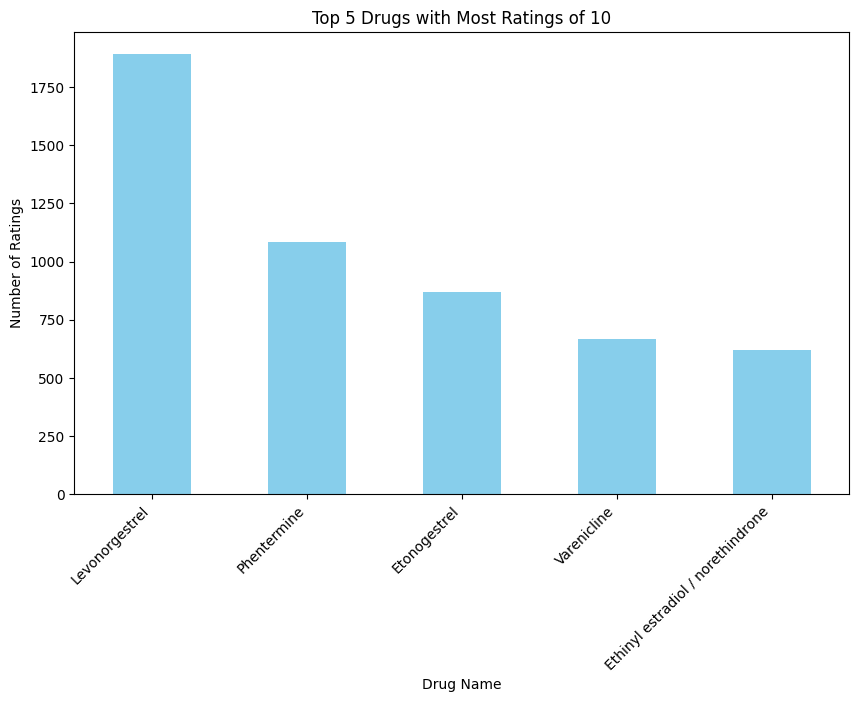

In [27]:
top_rated = df[df["rating"] == 10]


top_rated_drug_counts = top_rated["drugName"].value_counts().sort_values(ascending=False)[:5]

plt.figure(figsize=(10, 6))
top_rated_drug_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Drugs with Most Ratings of 10')
plt.xlabel('Drug Name')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
from wordcloud import WordCloud,STOPWORDS
review=df["review"].values

In [29]:
text=" ".join([review for review in df["review"].values])

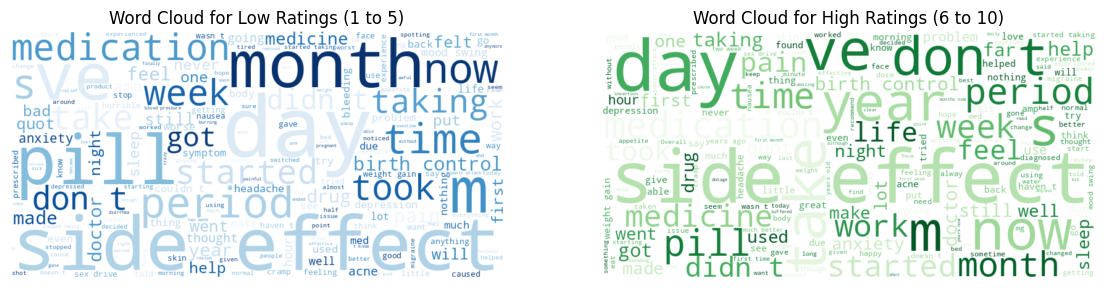

In [31]:
df['rating_class'] = df['rating'].apply(lambda x: 'Low' if 1 <= x <= 5 else 'High')

low_rating_reviews = df[df['rating_class'] == 'Low']["review"].values
high_rating_reviews = df[df['rating_class'] == 'High']["review"].values

low_rating_text = " ".join(low_rating_reviews)
high_rating_text = " ".join(high_rating_reviews)

stopwords = set(STOPWORDS)

low_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Blues').generate(low_rating_text)
high_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Greens').generate(high_rating_text)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(low_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Low Ratings (1 to 5)')

plt.subplot(1, 2, 2)
plt.imshow(high_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for High Ratings (6 to 10)')

plt.show()

In [32]:
df=df.drop(columns="new_condition")

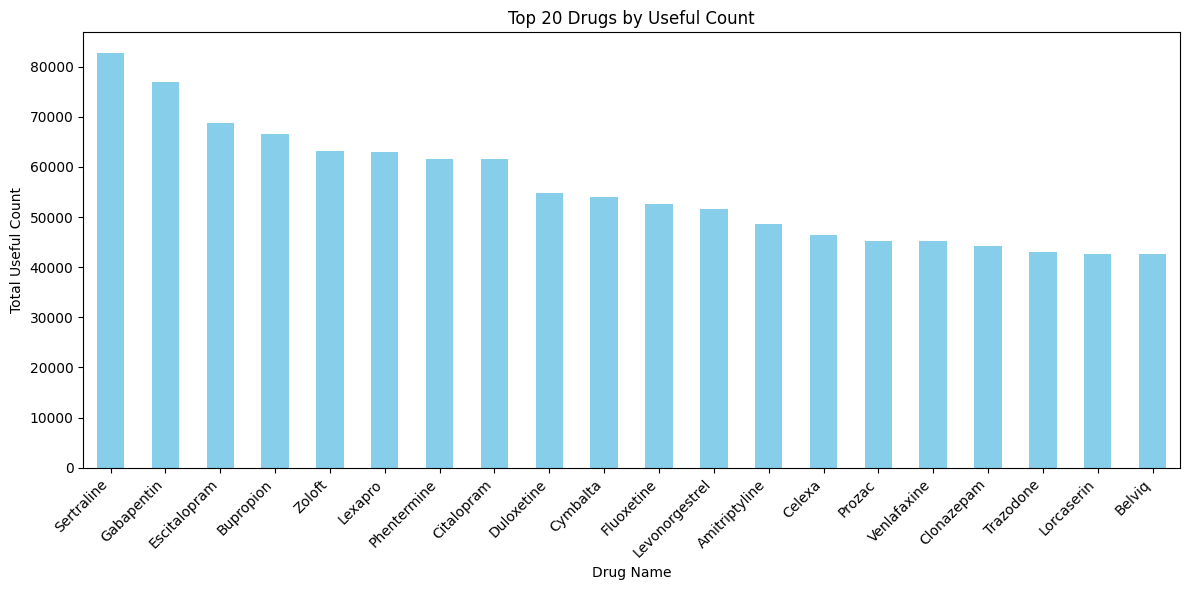

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


useful_counts = df.groupby("drugName")["usefulCount"].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
useful_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Drugs by Useful Count')
plt.xlabel('Drug Name')
plt.ylabel('Total Useful Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [34]:
df.duplicated().sum()

0

In [35]:
df=df[~df["condition"].str.contains("span")]

In [36]:
df["condition"].value_counts()

,count
condition,
Birth Control,38959
Depression,12226
Pain,8286
Anxiety,7850
Acne,7446
...,...
Cogan's Syndrome,1
"Paragonimus westermani, Lung Fluke",1
Hypopituitarism,1


In [37]:
df_condition=df.groupby("condition")["drugName"].nunique().reset_index()

In [38]:
df_condition=df_condition[df_condition["drugName"]==1]

In [39]:
df[df["condition"].isin(df_condition["condition"])]

,uniqueID,drugName,condition,review,rating,date,usefulCount,rating_class
552,66056,Propranolol,mance Anxiety,"""Went to the doctor to help with a clonidine t...",10,14-Apr-14,38,High
636,6308,Formoterol / mometasone,moterol / mometasone),"""I&#039;ve had asthma ever since I quit smokin...",9,24-May-16,3,High
1420,65584,Propranolol,mance Anxiety,"""Like most people on here, I have super bad pu...",10,5-Dec-17,1,High
1667,65779,Propranolol,mance Anxiety,"""I have always had the fear of speeches. Every...",10,25-May-16,26,High
1960,20388,Metformin / sitagliptin,min / sitagliptin),"""I was on Metformin (1000mg twice a day) and m...",3,7-May-15,37,Low
...,...,...,...,...,...,...,...,...
213200,3841,Ciprofloxacin,Acute Otitis Externa,"""Not a very good experience, severe head pain ...",1,6-Sep-16,1,Low
213481,131226,Amlodipine / valsartan,ge (amlodipine / valsartan),"""I have taken many antihypertensive medication...",5,13-Oct-09,33,Low
213521,162074,Ciprofloxacin,"Epididymitis, Sexually Transmitted","""For one.. do not listen to.all.of these peopl...",9,13-Oct-16,4,High
214326,65668,Propranolol,mance Anxiety,"""Like many others on this site I have a terrib...",10,29-Nov-16,22,High


In [40]:
df = df[~df['condition'].isin(df_condition['condition'])].reset_index(drop=True)

In [41]:
!pip install emoji
import pandas as pd
import re
import emoji
from nltk.stem import PorterStemmer

def clean_reviews(df):
    ps = PorterStemmer()

    def clean_text(text):
        text = re.sub(r'http\S+|www\S+', '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
        text = emoji.replace_emoji(text, replace='')  # Remove emojis
        text = text.lower()  # Convert to lowercase
        text = ' '.join(ps.stem(word) for word in text.split())  # Apply stemming
        return text

    df['review'] = df['review'].fillna("").apply(clean_text)
    return df


df_sample = df.sample(n=50000, random_state=42)

# Clean only the sampled data
df_cleaned = clean_reviews(df_sample)




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 18.6 MB/s eta 0:00:00


In [42]:
df_cleaned["sentiment"]=df_cleaned["rating"].apply(lambda x: 1 if x>5 else 0)

In [43]:
X=df_cleaned["review"]
y=df_cleaned["sentiment"]

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [45]:
from sklearn.model_selection import train_test_split
# Step 2: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initializing the Tokenizer
max_words = 55000  # Limit to the top 55,000 words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)  # Fit the tokenizer only on the training data

# Step 4: Converting Texts to Sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Step 5: Pad the Sequences
max_length = 350  # Set the maximum length of sequences
X_train_padded = pad_sequences(train_sequences, maxlen=max_length)
X_test_padded = pad_sequences(test_sequences, maxlen=max_length)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam

max_words = 55000
max_len = 350


model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=100))
model_lstm.add(SpatialDropout1D(0.3))  # Increased dropout for regularization
model_lstm.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))  # Increased units for LSTM layer
model_lstm.add(Dense(1, activation='sigmoid'))  # For binary classification

# Build the model
model_lstm.build((None, max_len))  # Specify the input shape here

# Model summary
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 350, 100)            │       5,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 350, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,617,377 (21.43 MB)

 Trainable params: 5,617,377 (21.43 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [48]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks for better training management
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras',
                                    monitor='val_loss',
                                    save_best_only=True,
                                    verbose=1)

# Model training with validation split and callbacks
history = model_lstm.fit(X_train_padded, y_train,
                    batch_size=128,
                    epochs=3,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])  # Include callbacks for early stopping and checkpointing

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7193 - loss: 0.5687
Epoch 1: val_loss improved from inf to 0.42106, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 408s 2s/step - accuracy: 0.7194 - loss: 0.5685 - val_accuracy: 0.8149 - val_loss: 0.4211
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8195 - loss: 0.4064
Epoch 2: val_loss improved from 0.42106 to 0.41789, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.8195 - loss: 0.4064 - val_accuracy: 0.8141 - val_loss: 0.4179
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8437 - loss: 0.3646
Epoch 3: val_loss improved from 0.41789 to 0.41189, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.8437 - loss: 0.3646 - val_accuracy: 0.8244 - val_loss: 0.4119


In [ ]:
accr = model_lstm.evaluate(X_test_padded, y_test)
print("Test Accuracy:", accr[1])

In [49]:
probs = model_lstm.predict(X_test_padded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 348ms/step


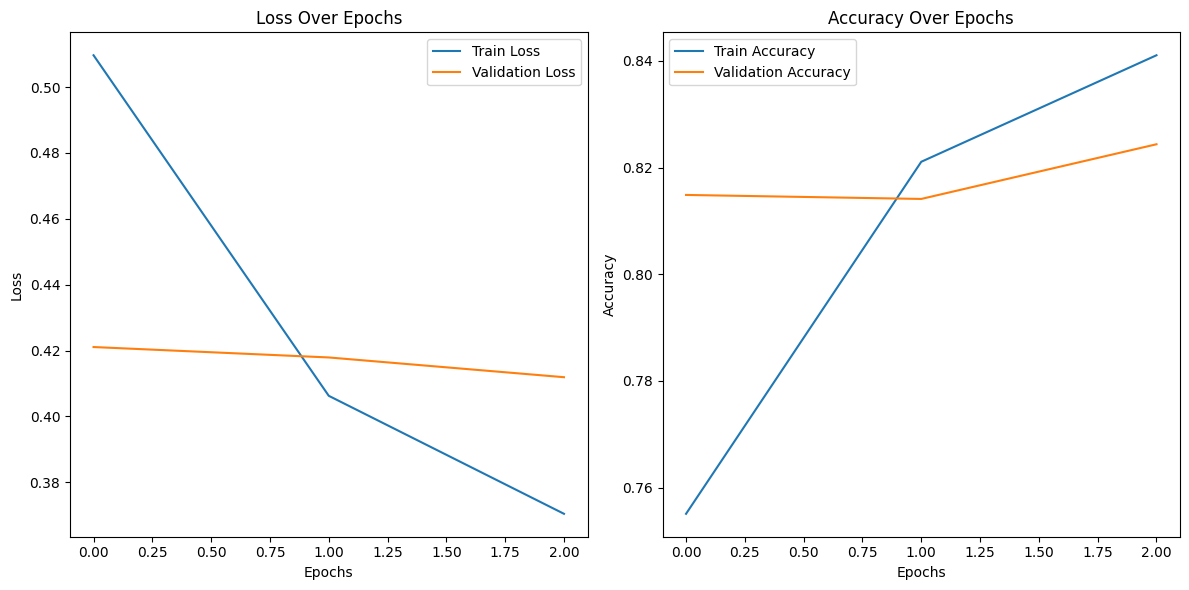

In [50]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer



# Step 1: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_vectorized = vectorizer.fit_transform(X).toarray()

# Step 2: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 3: Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [53]:
# Step 4: Set parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

# Step 5: Train the model
model_lgb = lgb.train(params, train_data, num_boost_round=100)

# Step 6: Make predictions
proba= model_lgb.predict(X_test)
y_pred_binary = [1 if x >= 0.5 else 0 for x in proba]

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 0.8184
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.55      0.65      3019
           1       0.83      0.93      0.88      6981

    accuracy                           0.82     10000
   macro avg       0.81      0.74      0.76     10000
weighted avg       0.81      0.82      0.81     10000



In [54]:
df_test_subset=df.sample(n=70000,random_state=42).copy()

In [55]:
df_test_subset

,uniqueID,drugName,condition,review,rating,date,usefulCount,rating_class
29875,165296,Phentermine / topiramate,Weight Loss,"""I started my journey at 236 and today I am at...",10,6-Mar-13,55,High
56258,132741,Prochlorperazine,Nausea/Vomiting,"""I&#039;ve been suffering from\r\r\nIBS for ye...",10,10-Jan-16,15,High
186635,25543,Lidocaine Viscous,Pain,"""Just diagnosed with Squamous Cell Carcinoma (...",9,25-Jan-12,19,High
80295,9548,Lo Loestrin Fe,Birth Control,"""My doc gave me the sample pack today he told ...",5,8-Apr-16,4,Low
79391,130207,Levonorgestrel,Birth Control,"""I had the Mirena inserted about 4 years ago, ...",10,25-May-14,17,High
...,...,...,...,...,...,...,...,...
135837,48166,Sumavel DosePro,Migraine,"""I love this medicine, when it works. Recentl...",10,11-Sep-16,5,High
112881,88441,Adderall,Narcolepsy,"""I am a 69 year old female who has been diagno...",10,25-Jul-12,75,High
11507,80878,Delsym,Cough,"""you will poo your pants within 1 hr of taking...",1,26-Nov-16,8,Low
201232,28461,Lexapro,Generalized Anxiety Disorde,"""I have no depression only anxiety disorder an...",8,2-Jul-13,56,High


In [56]:
!pip install emoji
import pandas as pd
import re
import emoji
from nltk.stem import PorterStemmer

def clean_reviews(df):
    ps = PorterStemmer()

    def clean_text(text):
        text = re.sub(r'http\S+|www\S+', '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
        text = emoji.replace_emoji(text, replace='')  # Remove emojis
        text = text.lower()  # Convert to lowercase
        text = ' '.join(ps.stem(word) for word in text.split())  # Apply stemming
        return text

    df['review'] = df['review'].fillna("").apply(clean_text)
    return df


# Clean only the sampled data
df_test_cleaned= clean_reviews(df_test_subset)




In [57]:
X_test_cleaned=df_test_cleaned["review"]

In [58]:
test_sequences = tokenizer.texts_to_sequences(X_test_cleaned)
X_test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [59]:
X_test_vectorized = vectorizer.transform(X_test_cleaned)

In [60]:
lstm_preds_test_subset = model_lstm.predict(X_test_padded)  # LSTM predictions
lgbm_preds_test_subset = model_lgb.predict(X_test_vectorized)  # LightGBM predictions


2188/2188 ━━━━━━━━━━━━━━━━━━━━ 448s 204ms/step


In [65]:
# Step 4: Calculate the sentiment score based on positive and negative word counts
import nltk
nltk.download('opinion_lexicon')
def calculate_sentiment_score(review, pos_words, neg_words):
    review_words = review.split()  # Split review into words
    pos_count = sum(1 for word in review_words if word in pos_words)  # Count positive words
    neg_count = sum(1 for word in review_words if word in neg_words)  # Count negative words

    # Sentiment score = positive words - negative words
    sentiment_score = pos_count - neg_count
    return sentiment_score

# Use the positive and negative word lists (opinion lexicon from nltk)
from nltk.corpus import opinion_lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Apply the sentiment score function to calculate raw sentiment scores
df_test_cleaned['sentiment_score'] = df_test_cleaned['review'].apply(
    lambda x: calculate_sentiment_score(x, positive_words, negative_words)
)

# Step 5: Normalize the sentiment score (min-max scaling) to a [0, 1] range
min_sentiment = df_test_cleaned['sentiment_score'].min()
max_sentiment = df_test_cleaned['sentiment_score'].max()
df_test_cleaned['normalized_sentiment_score'] = (df_test_cleaned['sentiment_score'] - min_sentiment) / (max_sentiment - min_sentiment)

# Step 6: Normalize the rating score (from 1-10) to a [0, 1] range
df_test_cleaned['normalized_rating'] = df_test_cleaned['rating'] / 10.0

# Step 7: Combine all parameters into the final score (you can adjust the weights as needed)
df_test_cleaned['final_score'] = (
    df_test_cleaned['normalized_sentiment_score'] + lstm_preds_test_subset.flatten() + lgbm_preds_test_subset.flatten() + df_test_cleaned['normalized_rating']
) / 4

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [66]:
df_test_cleaned

,uniqueID,drugName,condition,review,rating,date,usefulCount,rating_class,sentiment_score,normalized_sentiment_score,normalized_rating,final_score
29875,165296,Phentermine / topiramate,Weight Loss,i start my journey at 236 and today i am at th...,10,6-Mar-13,55,High,0,0.666667,1.0,0.859832
56258,132741,Prochlorperazine,Nausea/Vomiting,i039v been suffer from ib for year and compazi...,10,10-Jan-16,15,High,-1,0.641026,1.0,0.865058
186635,25543,Lidocaine Viscous,Pain,just diagnos with squamou cell carcinoma cance...,9,25-Jan-12,19,High,-2,0.615385,0.9,0.798643
80295,9548,Lo Loestrin Fe,Birth Control,my doc gave me the sampl pack today he told me...,5,8-Apr-16,4,Low,2,0.717949,0.5,0.426876
79391,130207,Levonorgestrel,Birth Control,i had the mirena insert about 4 year ago after...,10,25-May-14,17,High,-6,0.512821,1.0,0.498268
...,...,...,...,...,...,...,...,...,...,...,...,...
135837,48166,Sumavel DosePro,Migraine,i love thi medicin when it work recent i039v h...,10,11-Sep-16,5,High,1,0.692308,1.0,0.881288
112881,88441,Adderall,Narcolepsy,i am a 69 year old femal who ha been diagnos w...,10,25-Jul-12,75,High,1,0.692308,1.0,0.890660
11507,80878,Delsym,Cough,you will poo your pant within 1 hr of take thi...,1,26-Nov-16,8,Low,0,0.666667,0.1,0.498956
201232,28461,Lexapro,Generalized Anxiety Disorde,i have no depress onli anxieti disord and pani...,8,2-Jul-13,56,High,-9,0.435897,0.8,0.756225


In [74]:
group=df_test_cleaned.groupby(["condition","drugName"])["final_score"].mean().reset_index()


In [90]:
group.sort_values(by=['condition', 'final_score'], ascending=[True, False])

,condition,drugName,final_score
11,ADHD,Catapres,0.933638
40,ADHD,ProCentra,0.925775
16,ADHD,Desoxyn,0.886744
36,ADHD,Nuvigil,0.883451
43,ADHD,Ritalin LA,0.874896
...,...,...,...
5742,zen Shoulde,Indocin,0.810956
5743,zen Shoulde,Indomethacin,0.810956
5746,zen Shoulde,Relafen,0.800388
5744,zen Shoulde,Nabumetone,0.672514
